## 선형 회귀

### k-최근접 이웃의 한계

In [2]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

이번에도 훈련 세트와 데이터 세트로 나누자. 특성 데이터는 2차원 배열로 변환한다.

In [3]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

# 훈련 세트와 테스트 세트를 2차원 배열로 만들기
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

이웃 개수를 3으로 하여 모델을 훈련

In [4]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors = 3)

# k-최근접 이웃 회귀 모델을 훈련
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [5]:
# 길이 50cm 농어의 무게를 예측
print(knr.predict([[50]]))

[1033.33333333]


그런데 실제 농어의 무게는 1033g보다 훨씬 많이 나간다고 한다. 어디서 문제가?

### 산점도를 그려보자  
그리고 사이킷런의 k-최근접 이웃 모델의 kneighbors() 메서드를 사용하면 가장 가까운 이웃까지의 거리와 이웃 샘플의 인덱스를 얻을 수 있다.

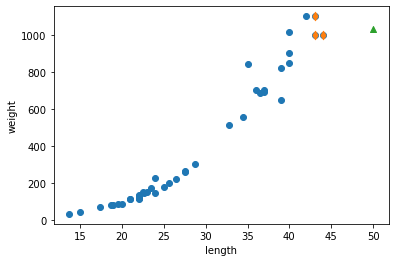

In [6]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구한다.
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그린다.
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그리자.
plt.scatter(train_input[indexes], train_target[indexes], marker = 'd')

# 50cm 농어 데이터
plt.scatter(50, 1033, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

50cm 농어에서 가장 가까운 샘플들은 45cm 근방이기 때문에 k-최근접 이웃 알고리즘은 이 샘플들의 무게를 평균한다. 이웃 샘플들의 타깃의 평균들을 구해보자.

In [7]:
print(np.mean(train_target[indexes]))

1033.3333333333333


모델이 예측했던 값과 일치한다.(k-최근접 이웃 회귀는 가장 가까운 샘플을 찾아 타깃을 평균한다. 따라서 새로운 샘플이 훈련 세트의 범위를 벗어나면 괴리되는 값을 예측할 수 있다. 예를 들어 이 훈련 모델에서는 길이가 100cm인 농어도 1033g으로 예측할 것이다.

In [8]:
print(knr.predict([[1000]]))

[1033.33333333]


그래프를 한번 더 그러볼까?

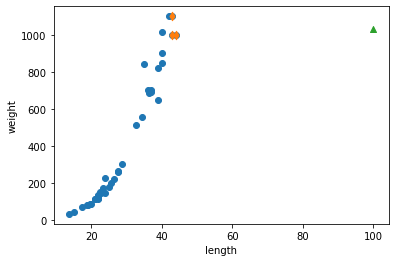

In [9]:
# 100cm 농어의 이웃을 구한다.
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그려보자
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그린다.
plt.scatter(train_input[indexes], train_target[indexes], marker = 'd')

# 100cm 농어 데이터
plt.scatter(100, 1033, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

k-최근접 이웃을 사용해 이 문제를 해결하려면 가장 큰 농어가 포함되도록 하는 훈련 세트를 다시 만들어야 한다.

---

## 선형 회귀(Linear Regression)  
선형 회귀는 널리 사용되는 대표적인 회귀 알고리즘이다.  
특성이 하나인 경우 어떤 직선을 학습하는 알고리즘이다. 학습할 직선은 특성을 가장 잘 나타낼수 있는 직선이어야한다.

사이킷런은 sklearn.linear_model 패키지 아래에 LinearRegression 클래스로 선형 회귀 알고리즘을 구현해 놓았다. 이 클래스의 객체를 만들어 훈련해보자.  
LinearRegression 클래스에도 fit(), score(), predict() 메서드가 존재한다.

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델을 훈련한다.
lr.fit(train_input, train_target)

# 50cm 농어에 대해 예측해보자
print(lr.predict([[50]]))

[1241.83860323]


이 선형 회귀가 학습한 직선을 그려보고 어떻게 이런 값이 나왔는지 알아보자.

하나의 직선을 그리려면 기울기와 절편이 있어야 한다.  
$ y = a*x + b $처럼 쓸 수 있다.

여기에서 x를 농어의 길이, y를 농어의 무게로 바꾸면 다음과 같다.

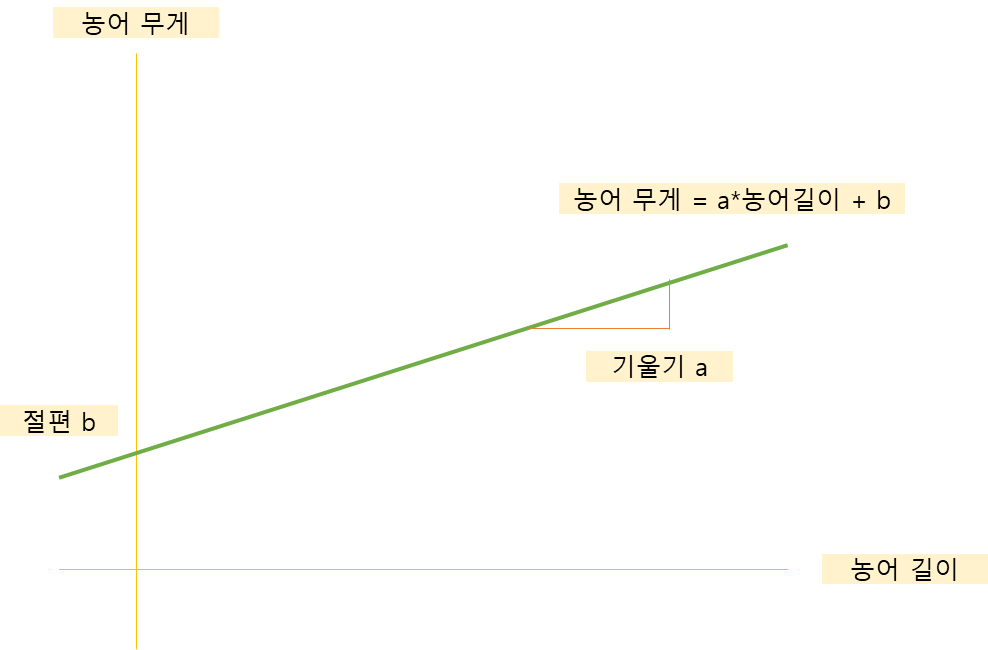  

클래스가 찾은 a와 b는 lr 객체의 coef_와 intercept_ 속성에 저장되어 있다.  
coef_ 속성 이름에서 알 수 있듯이 머신러닝에서 기울기를 종종 계수(coefficient), 또는 가중치(weight)라고 부른다.

coef_와 intercept_를 머신러닝 알고리즘이 찾은 값이라는 의미로 **모델 파라미터**(model parameter)라고 부른다.  
많은 머신러닝 알고리즘의 훈련 과정은 최적의 모델 파라미터를 찾는 것과 같다. 이를 **모델 기반 학습**이라고 부른다.
앞서 사용한 k-최근접 이웃 알고리즘에는 모델 파라미터가 없다. 훈련 세트를 저장하는 것이 훈련의 전부였고 이를 **사례 기반 학습**이라고 한다.

In [11]:
# a와 b를 구해보자
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


농어의 길이 15에서 50까지 그려보고 훈련 세트의 산점도와 함께 그려보자.  
이때 이 직선을 그리려면 앞에서 구한 기울기와 절편을 사용하여 (15, 15x39-709), (50,50x39-709) 두 점을 이으면 된다.

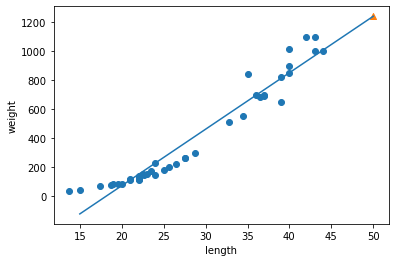

In [12]:
# 훈련 세트의 산점도를 그리자
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프를 그리자. 두 점을 이어서.
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker ='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

이제 훈련 세트 범위를 벗어난 농어의 무게도 예측이 가능해졌다.  
훈련 세트와 테스트 세트에 대한 $R^2$ 점수를 확인해보자.

In [13]:
print(lr.score(train_input, train_target)) # 훈련 세트
print(lr.score(test_input, test_target)) # 테스트 세트


0.939846333997604
0.8247503123313558


훈련 세트와 테스트 세트 점수가 조금 차이가 나고 훈련 세트의 점수도 높지 않아 전체적으로 과소적합되어 보인다. 
즉, 점수도 섭섭하고 훈련 상태가 아쉬운 상태이다. 또한 그래프 왼쪽 아래부분은 직선그래프와 샘플 데이터들이 다소 괴리가 있어보인다.  
직선에 따르면 농어의 무게가 0g이하로 내려갈 것이다.  
농어의 길이와 무게에 대한 산점도를 보면 일직선이라기보다 왼쪽 위로 살짝 구부러진 곡선에 가깝다.
### 즉 최적의 직선을 찾기보다 최적의 곡선을 찾아보는 것이 맞을 것이다.

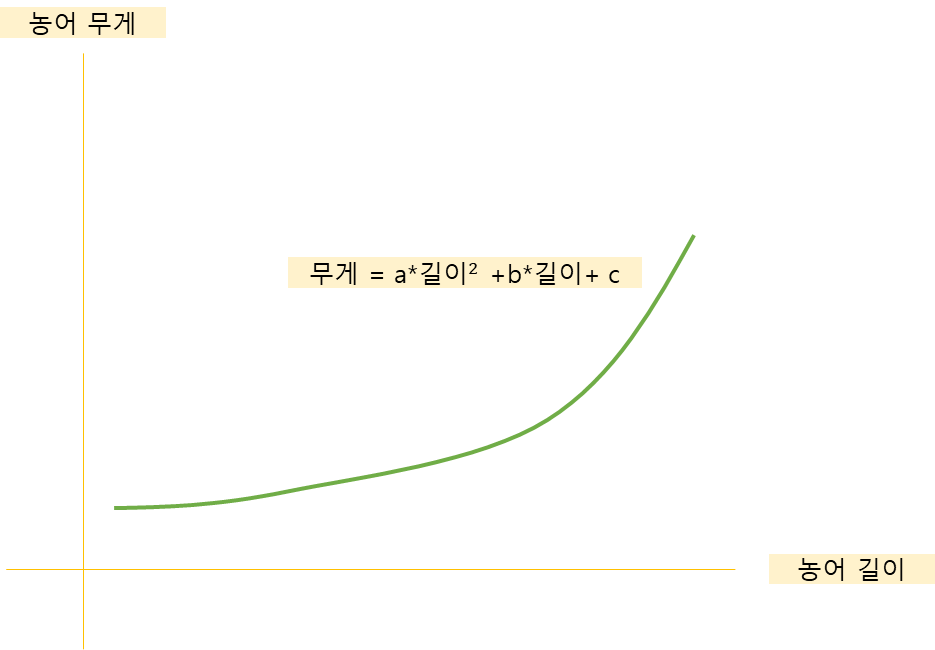

2차 방정식의 그래프를 그리려면 길이를 제곱한 항이 훈련 세트에 추가되어야 한다. 길이를 제곱해서 원래 데이터 앞에 붙여보자

In [15]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

2장에서 사용했던 column_stack() 함수를 사용하면 간단하게 train_input을 제곱한 것과 train_input을 나란히 붙일 수 있다. test_input도 마찬가지이다.  
이때 train_input ** 2 식에도 넘파이 브로드캐스팅이 적용되어 train_input의 모든 원소를 제곱하게 된다. 새롭게 만든 데이터셋의 크기를 아래에서 확인해보자.

In [16]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


원래 특성인 길이를 제곱하여 왼쪽열에 추가했기 때문에 훈련 세트와 테스트 세트 모두 열이 2개로 늘어났다.  
이제 train_poly를 사용해 선형 회구 모델을 다시 훈련해본다. 이 모델이 2차 방정식의 a, b, c 를 찾을 것이다.  
이때 훈련 세트에 제곱항을 추가하였지만 타깃값은 그대로 사용한다. 목표하는 값은 어떤 그래프를 훈련하든지 바꿀 필요가 없다.  
앞서 훈련 세트에서 했던 것처럼 테스트할 때는 이 모델에 길이의 제곱과 원래 길이를 함께 넣어 주어야한다.

In [17]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


앞선 1절에서 훈련한 모델보다 더 높은 값을 예측하였다. 이 모델이 훈련한 계수와 절편을 확인해보자.

In [18]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


이 모델은 다음과 같이 그래프를 학습하였다.  
$무게 = 1.01 * 길이^2 -21.6 * 길이 +116.05$

이 식은 2차 방정식이지만 제곱항을 $길이^2 = 왕길이$ 처럼 치환한다면 1차 방정식이 되어 선형 관계로 표현이 가능하다.  
이런 방정식을 다항식이라 부르며 다항식을 사용한 선형 회귀를 **다항 회귀(polynominal regression)**라 부른다.

2차 방정식의 계수와 절편 a, b, c를 알았으니 훈련 세트의 산점도에 그래프를 그려보자. 짧은 직선을 이어 그리면 마치 곡선처럼 표현이 가능하다. 여기서는 1씩 짧게 끊어 그려보겠다.

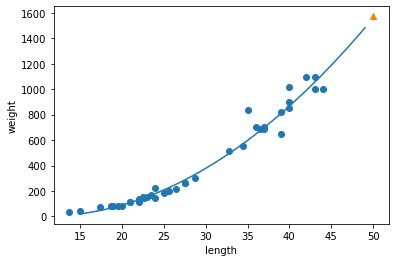

In [21]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 생성.
point = np.arange(15,50)

# 훈련 세트의 산점도를 그려보자.
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프를 그린다.
plt.plot(point, 1.01*point**2 -21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter(50, 1574, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

훈련 세트의 경향을 잘 따르고 무게가 음수로 나오는 일도 없을 그래프가 그려졌다. 훈련 세트와 테스트 세트의 $R^2$ 점수를 평가해보자

In [22]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325121


훈련 세트와 테스트 세트 두 점수 모두 높아졌지만 여전히 테스트 세트 점수가 높다. 과소적합이 남아 있다. 더 복잡한 모델이 필요하다.

### 선형회귀
+ 특성과 타깃 사이의 관계를 가장 잘 나타내는 선형 방정식을 찾는다. 특성이 하나면 직선 방정식이 된다.  
+ 선형 회귀가 찾은 특성과 타킷 사이의 관계는 선형 방정식의 **계수** 또는 **가중치**에 저장이 된다. 머신러닝에서 가중치는 방정식의 기울기와 절편을 모두 의미하는 경우가 많다.  

### 모델 파라미터
+ 선형 회귀가 찾은 가중치처럼 머신러닝 모델이 특성에서 학습한 파라미터를 말한다.  

### 다항 회귀  
+ 다항식을 사용하여 특성과 타깃 사이의 관계를 나타낸다. 이 함수는 비선형일수 있지만 여전히 선형 회귀로 표현이 가능하다.

### scikit-learn  
+ **LinearRegression**은 사이킷런의 선형 회귀 클래스이다.  
    fit_intercept 매개변수를 False로 지정하면 절편을 학습하지 않는다. 이 매개변수의 기본값은 True 이다.
    학습된 모델의 coef_ 속성은 특성에 대한 계수를 포함한 배열이다. 즉 이 배열의 크기는 특성의 개수와 같다. intercept_ 속성에는 절편이 저장되어 있다.